In [1]:
"""
Solving MNIST
"""

'\nSolving MNIST\n'

In [2]:
"""
Slight cheating here: I asked this at the end of the code so that Codex knew what to import
"""
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

In [3]:
# Import Dropout
from tensorflow.keras.layers import Dropout

In [4]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Text(0.5, 1.0, 'Class 5')

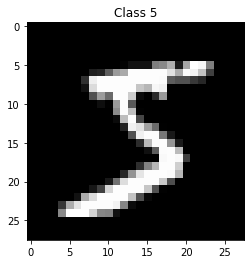

In [5]:
# Display an example from the dataset
plt.imshow(x_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))

In [6]:
# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [7]:
# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [8]:
# Create an ML model
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [9]:
# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [10]:
# Train the model
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 2ms/step - loss: 0.3553 - accuracy: 0.8930
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0816 - accuracy: 0.9755
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0562 - accuracy: 0.9825
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0392 - accuracy: 0.9878
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0320 - accuracy: 0.9900
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0278 - accuracy: 0.9906
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0216 - accuracy: 0.9928
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0213 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0165 - accuracy: 0.9945
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.01

In [11]:
# Make a prediction on the 10th example of x_test
prediction = model.predict(x_test[9].reshape(1, 28, 28, 1))

Text(0.5, 1.0, 'Prediction: 9')

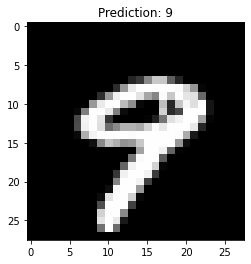

In [12]:
# Display the prediction
plt.imshow(x_test[9].reshape(28, 28),cmap='gray')
plt.title('Prediction: '+ str(np.argmax(prediction)))

In [13]:
# Evaluate the model
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0660 - accuracy: 0.9848


[0.06599490344524384, 0.9847999811172485]